In [23]:
using Optim, PyPlot

Now we will do the utility example again. The Optim package does bracketed univariate optimization and  multivariate optimization.

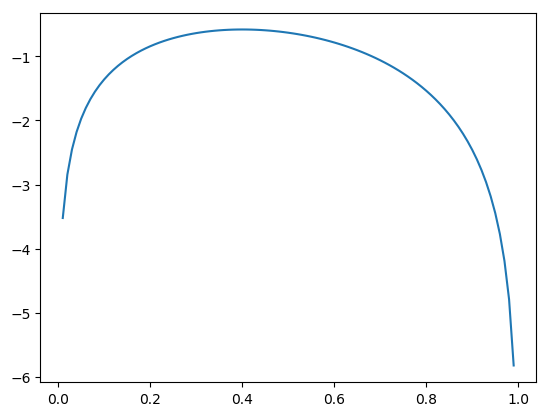

In [24]:
w = 3.;
alpha_h = 1.5;
assets = 0;
ufun(h) = log(w*h + assets) + alpha_h*log(1 - h);
ufun(0.5)
hgrid = 0:0.01:0.99;
plot(hgrid, ufun.(hgrid)); # Remember the dot

In [25]:
ret = optimize(x -> -ufun(x), 0.2, 0.8)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.200000, 0.800000]
 * Minimizer: 4.000000e-01
 * Minimum: 5.839169e-01
 * Iterations: 9
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 10

This is as in Matlab, except for univariate problems it wants a bracket, not an initial guess. This is usually more efficient anyway. If you really need an initial guess version, you could make your function return a length 1 array. Alternatively, I have a package which does this.

Here is the multivariate version for family labor supply. 

In [26]:
w1 = 3.;
w2 = 2.;
alpha_h = 1.5;
assets = 0;
function ufun(h)
    h1, h2 = h[1], h[2]
    (h1 >= 1 || h2 >= 1) && return -Inf
    c = w1*h1 + w2*h2 + assets
    c <= 0 && return -Inf
    log(c) + alpha_h*log(1 - h1) + alpha_h*log(1 - h2)
end
ufun([0.5; 0.5])
optimize(x -> -ufun(x), [0.5, 0.5])

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [0.5,0.5]
 * Minimizer: [0.3750033030201022,0.06252867327743697]
 * Minimum: 5.786697e-01
 * Iterations: 30
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 59

In [27]:
optimize(x -> -ufun(x), [0.5, 0.5], BFGS())

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.5,0.5]
 * Minimizer: [0.37500000000300954,0.06249999999395787]
 * Minimum: 5.786697e-01
 * Iterations: 6
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 7.89e-07 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 1.68e-12 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 7.33e-11 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 19
 * Gradient Calls: 19

Above I changed the optimization algorithm from Nelder-Mead (slow, robust) to BFGS (fast, not as robust)

Why did we need the return -Inf part? Try evaluating log of a negative number

In [28]:
log(-2)

LoadError: DomainError with log:
-2.0 will only return a complex result if called with a complex argument. Try -2.0(Complex(x)).

Julia is pickier than Matlab about types. Matlab will convert the output to complex automatically. This is usually not sensible and is actually horrible for performance (see Type Stability in the Julia documentation). 

Regardless of the language, you should always handle undefined utility values properly. Negative consumption or impossible hours is just -Inf utility. It is infinitely bad. If you do this, optimization algorithms will recognize this and retreat from any guesses which generate that outcome.